In [1]:
import pickle
pickle_in=open("X.pickle",'rb')
X=pickle.load(pickle_in)

pickle_in_y=open("Y.pickle",'rb')
Y=pickle.load(pickle_in_y)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model=tf.keras.applications.mobilenet.MobileNet()#pretrained model for imagenet

In [4]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [5]:
base_input=model.layers[0].input

In [6]:
base_output=model.layers[-4].output

In [7]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [8]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [9]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [10]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
history=new_model.fit(X,Y,epochs=10,validation_split=0.2)

Epoch 1/10
96/96 [==============================] - 2602s 27s/step - loss: 0.0101 - accuracy: 0.9961 - val_loss: 0.0047 - val_accuracy: 0.9987
Epoch 2/10
96/96 [==============================] - 2558s 27s/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 3/10
96/96 [==============================] - 2396s 25s/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0436 - val_accuracy: 0.9882
Epoch 4/10
96/96 [==============================] - 2886s 30s/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0451 - val_accuracy: 0.9882
Epoch 5/10
96/96 [==============================] - 1833s 19s/step - loss: 0.0040 - accuracy: 0.9980 - val_loss: 0.0119 - val_accuracy: 0.9961
Epoch 6/10
96/96 [==============================] - 1293s 13s/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0136 - val_accuracy: 0.9961
Epoch 7/10
96/96 [==============================] - 1342s 14s/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0084 - val_accuracy: 0.9961

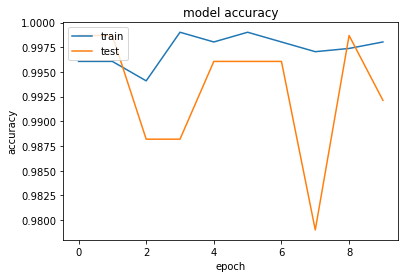

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 

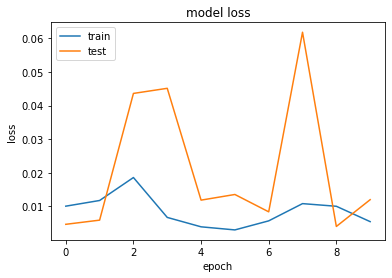

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

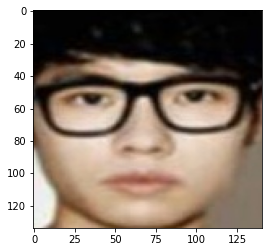

In [13]:
import cv2
import matplotlib.pyplot as plt
frame1=cv2.imread("H:/MY COMPUTER/Personal documents/cadc AI/Notes/Project/Face-Mask-Detection-master/dataset/without_mask/1_0_lixingliang_0018.jpg")
plt.imshow(cv2.cvtColor(frame1,cv2.COLOR_BGR2RGB))

In [15]:
import numpy as np
final_image1=cv2.resize(frame1,(224,224))
final_image1=np.expand_dims(final_image1,axis=0)


In [16]:
predictions1=new_model.predict(final_image1)
predictions1

array([[0.9999188]], dtype=float32)

In [17]:

frame=cv2.imread("H:/MY COMPUTER/Personal documents/cadc AI/Notes/Project/Face-Mask-Detection-master/dataset/with_mask/0_0_16 copy 8.jpg")

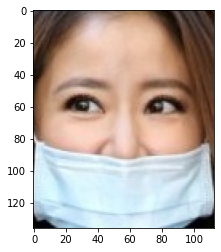

In [18]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [19]:
final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0)


In [20]:
predictions=new_model.predict(final_image)
predictions

array([[3.4369814e-09]], dtype=float32)

In [23]:
new_model.save("my_mask_model.h5")